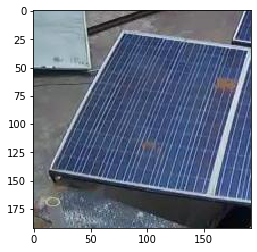

In [263]:
import rectification as rec
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image


img = plt.imread(r'../data/mobile_net_v21000/DeepSolarEye_192x192/solar_Fri_Jun_16_11__52__48_2017_L_0.684431929787_I_0.690780392157.jpg')
mask = plt.imread(r'../data/mobile_net_v21000/DeepSolarEye_192x192_mask/solar_Fri_Jun_16_11__52__48_2017_L_0.684431929787_I_0.690780392157.jpg')
#mask = cv2.resize(mask, (1280,1280))
plt.imshow(img)


In [315]:
image = Image.open(r'../data/mobile_net_v21000/DeepSolarEye_192x192/solar_Fri_Jun_16_11__52__48_2017_L_0.684431929787_I_0.690780392157.jpg')
print(image.getbbox())
im_rotate = image.rotate(9)
box = (20, 20, 180, 160)
cropped_image = im_rotate.crop(box)

(0, 0, 192, 192)


In [316]:
resize = cropped_image.resize((192,192))

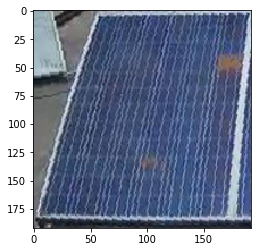

In [317]:
plt.imshow(resize)

In [245]:
def crop(image):
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    return image[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]

In [246]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(mask,200,255,cv2.THRESH_BINARY_INV)

In [247]:
edge = cv2.Canny(img, 60, 180)

In [248]:
contours, hierarchy = cv2.findContours(thresh,  
    cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [249]:
hierarchy[0][0][3]

-1

In [250]:
lower_threshold = 0.3
upper_threshold = 0.6

In [251]:
    total_area = 0
    bigest_cnt = []
    rec_images = []

In [252]:
    for cnt in contours:
        area = cv2.contourArea(cnt)
        total_area += area
    total_area

51182.5

In [253]:
i = 0
for cnt in contours:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.03 * peri, True)
        area = cv2.contourArea(cnt)
        i += 1
        if len(approx) == 4:
            if area > total_area * lower_threshold and area < total_area * upper_threshold:
                bigest_cnt.append(cnt)
                print(area, len(approx), hierarchy[0][0][1])
                

16164.0 4 -1


In [254]:
cnt = bigest_cnt[0]

In [255]:
hull = cv2.convexHull(cnt)

In [256]:
        black = np.zeros_like(img1)
        black2 = black.copy()

        cv2.drawContours(black2, [hull], -5, (255, 255, 255), -1)
        cv2.drawContours(black2, [hull], -5, (255, 255, 255), 2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

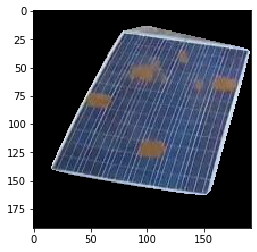

In [257]:
plt.imshow(masked)

In [258]:
masked = cv2.bitwise_and(img, img, mask = black2)

In [259]:
    for cnt in bigest_cnt:
                
        hull = cv2.convexHull(cnt)

        black = np.zeros_like(img1)
        black2 = black.copy()

        cv2.drawContours(black2, [hull], -5, (255, 255, 255), -1)
        cv2.drawContours(black2, [hull], -5, (255, 255, 255), 2)

        masked = cv2.bitwise_and(img, img, mask = black2) 

        panel_crop = cv2.resize(masked,(192,192))
        edgelets1 = rec.compute_edgelets(panel_crop)

        vp1 = rec.ransac_vanishing_point(edgelets1, num_ransac_iter=2000, 
                                 threshold_inlier=5)
        vp1 = rec.reestimate_model(vp1, edgelets1, threshold_reestimate=5)

        edgelets2 = rec.remove_inliers(vp1, edgelets1, 10)
        vp2 = rec.ransac_vanishing_point(edgelets2, num_ransac_iter=2000,
                                 threshold_inlier=5)
        vp2 = rec.reestimate_model(vp2, edgelets2, threshold_reestimate=5)

        warped_img = rec.compute_homography_and_warp(panel_crop, vp1, vp2)

        rec_img = cv2.resize(crop(warped_img), (192,192))
        rec_images.append(rec_img)

In [260]:
len(rec_images)

1

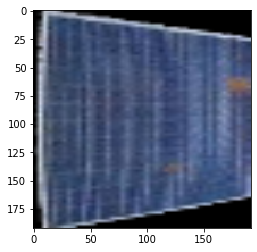

In [261]:
#mask = cv2.blur(mask,(5,5),0)
plt.imshow(rec_images[0])

In [125]:
img1 = cv2.cvtColor(panel, cv2.COLOR_BGR2GRAY)

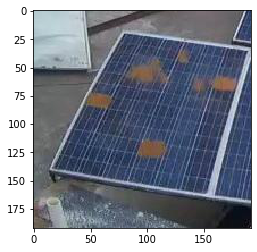

In [126]:
plt.imshow(panel)

In [127]:
#cv2.boundingRect(panel)

In [128]:
ret,thresh=cv2.threshold(mask,200,255,cv2.THRESH_BINARY_INV)

In [129]:
edged = cv2.Canny(mask,50,700,False)

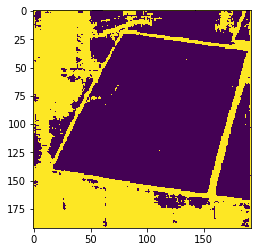

In [130]:
plt.imshow(thresh)

In [131]:
contours, hierarchy = cv2.findContours(thresh,  
    cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE   )

In [132]:
len(contours)

141

In [14]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [10,  8, -1, -1],
        [11,  9, -1, -1],
        [12, 10, -1, -1],
        [13, 11, -1, -1],
        [14, 12, -1, -1],
        [15, 13, -1, -1],
        [16, 14, -1, -1],
        [17, 15, -1, -1],
        [18, 16, -1, -1],
        [19, 17, -1, -1],
        [20, 18, -1, -1],
        [21, 19, -1, -1],
        [22, 20, -1, -1],
        [23, 21, -1, -1],
        [24, 22, -1, -1],
        [25, 23, -1, -1],
        [26, 24, -1, -1],
        [-1, 25, 27, -1],
        [28, -1, -1, 26],
        [29, 27, -1, 26],
        [30, 28, -1, 26],
        [31, 29, -1, 26],
        [32, 30, -1, 26],
        [33, 31, -1, 26],
        [34, 32, -1, 26],
        [35, 33, -1, 26],
        [36, 34, -1, 26],
        [37, 35, -1, 26],
        [38, 36, -1, 26],
        [39,

In [15]:
def get_largest_contour(contours):

    bigest_areas= 0
    bigest_cnt = []

    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)

    return all_areas


In [16]:
bigest_areas= 0
bigest_cnt = []



In [17]:
bigest_cnt

[]

In [18]:
total_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    total_area += area
total_area

16093.0

In [19]:
threshold = 0.1

In [20]:
for cnt in contours:
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.03 * peri, True)
    print(len(approx))
    area = cv2.contourArea(cnt)
    print(area)
    if len(approx) == 4:
        if area > total_area * threshold:
            bigest_areas = area
            bigest_cnt.append(cnt)

2
0.0
6
3.5
1
0.0
1
0.0
2
1.0
1
0.0
3
1.0
3
0.5
4
1.5
1
0.0
1
0.0
1
0.0
4
0.0
1
0.0
1
0.0
2
0.0
3
0.5
11
3.0
4
0.5
8
9.5
2
0.0
1
0.0
1
0.0
8
1.5
2
0.0
2
0.0
9
15146.5
4
2.0
6
5.5
6
4.0
6
4.0
6
4.0
10
19.5
6
7.0
6
4.0
6
4.0
9
20.0
8
83.5
5
335.0
6
4.0
4
2.0
6
6.0
4
2.0
4
2.0
4
2.0
4
2.0
6
6.0
4
2.0
8
23.0
6
8.0
9
62.5
6
9.5
4
2.0
4
2.0
6
4.0
4
2.0
4
2.0
10
12.0
6
4.0
6
4.0
6
4.0
4
2.0
4
2.0
6
6.0
6
6.0
6
6.0
6
5.5
8
23.5
4
2.0
6
4.0
8
10.0
7
18.5
6
4.0
6
13.5
6
4.0
4
2.0
6
19.5
4
2.0
10
93.5
6
4.0
4
2.0
9
24.5
6
4.0
4
2.0
6
4.0


In [21]:
len(bigest_cnt)

0

In [22]:
#bigest_cnt

In [23]:
area = cv2.contourArea(bigest_cnt[0])
area

IndexError: list index out of range

In [24]:
#epsilon = 0.1*cv2.arcLength(cnt,True)
#approx = cv2.approxPolyDP(cnt,epsilon,True)

In [25]:
hull = cv2.convexHull(bigest_cnt[0])
#hull

IndexError: list index out of range

In [26]:
len(hull)

NameError: name 'hull' is not defined

In [1053]:
cv2.contourArea(hull)

15848.5

In [1054]:
black = np.zeros_like(img1)


In [1055]:
img2 = img1.copy()
black2 = black.copy()

In [1056]:
cv2.drawContours(black2, [hull], -5, (255, 255, 255), -1)
#cv2.drawContours(black2, [hull], -5, (255, 255, 255), 10)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [1057]:
#cv2.drawContours(black2, [hull1], -5, (255, 255, 255), -1)
#cv2.drawContours(black2, [hull1], -5, (255, 255, 255), 10)

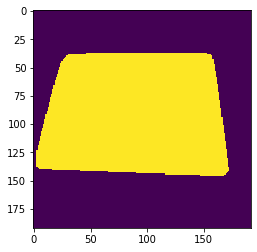

In [1058]:
plt.imshow(black2)

In [1087]:
masked = cv2.bitwise_and(panel, panel, mask = black2) 

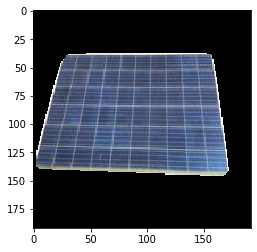

In [1088]:
plt.imshow(masked)

In [ ]:
Use warpPerspective !!!!!

In [1086]:
ih, iw = crop.shape
bh, bw,  = black.shape

AttributeError: 'function' object has no attribute 'shape'

In [1077]:
pts_src = np.array([[0.0, 0.0],[float(iw), 0.0],[float(iw), float(ih)],[0.0,float(ih)]])
pts_dst = np.array([[bw * 0.25, 0],[bw * 0.75, 0.0],[float(bw), float(bh)],[0.0,float(bh)]])
h, status = cv2.findHomography(pts_src, pts_dst)


In [1078]:
im_out = cv2.warpPerspective(black2, h, (black.shape[1],black.shape[0]))
cv2.imwrite("im_outImage.jpg", im_out)

True

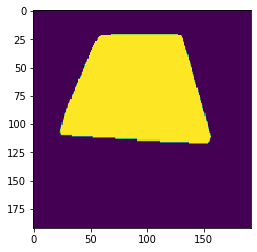

In [1079]:
plt.imshow(im_out)

In [1063]:
panel_crop = cv2.resize(masked,(192,192))

In [1064]:
edgelets1 = rec.compute_edgelets(panel_crop)

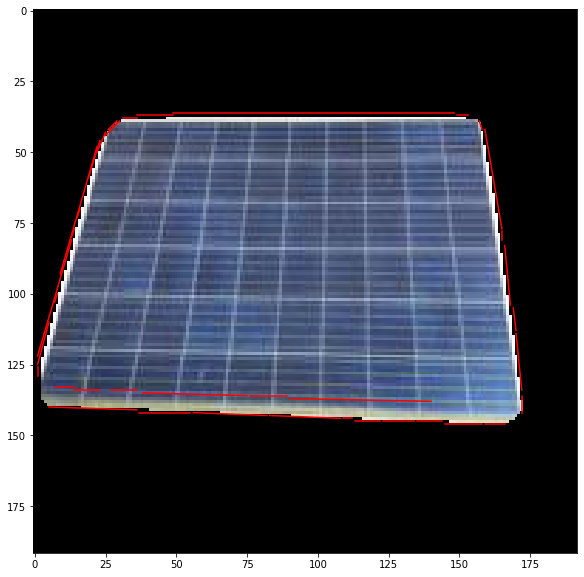

In [1065]:
rec.vis_edgelets(panel_crop, edgelets1) # Visualize the edgelets

C:\Users\ckw-haec\code\photovoltaic_images\notebooks\rectification.py:121: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.abs(cosine_theta))
C:\Users\ckw-haec\code\photovoltaic_images\notebooks\rectification.py:297: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  est_model = np.linalg.lstsq(a, b)[0]


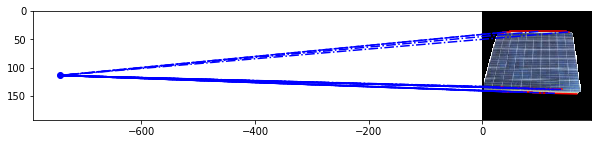

In [1066]:
vp1 = rec.ransac_vanishing_point(edgelets1, num_ransac_iter=2000, 
                             threshold_inlier=5)
vp1 = rec.reestimate_model(vp1, edgelets1, threshold_reestimate=5)
rec.vis_model(panel_crop, vp1) # Visualize the vanishing point model

C:\Users\ckw-haec\code\photovoltaic_images\notebooks\rectification.py:121: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.abs(cosine_theta))
C:\Users\ckw-haec\code\photovoltaic_images\notebooks\rectification.py:297: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  est_model = np.linalg.lstsq(a, b)[0]


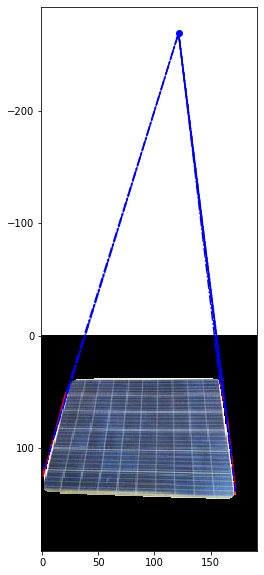

In [1067]:
edgelets2 = rec.remove_inliers(vp1, edgelets1, 10)
vp2 = rec.ransac_vanishing_point(edgelets2, num_ransac_iter=2000,
                             threshold_inlier=5)
vp2 = rec.reestimate_model(vp2, edgelets2, threshold_reestimate=5)
rec.vis_model(panel_crop, vp2) # Visualize the vanishing point model

In [1068]:
warped_img = rec.compute_homography_and_warp(panel_crop, vp1, vp2)
warped_img.shape

(119, 149, 3)

In [1069]:
img = cv2.resize(warped_img, (192,192))

In [1070]:
def crop(image):
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    return image[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]

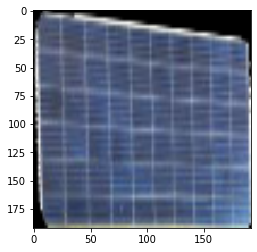

In [1071]:
plt.imshow(cv2.resize(crop(warped_img), (192, 192)))